# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


/opt/anaconda3/envs/oldfashioned/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Random Split

In [2]:
df = pd.read_csv('./TMDB_all_movies.csv')
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path
0,2,Ariel,7.1,335.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,suomi,"Heikki Salomaa, Hanna Jokinen, Matti Pellonpää...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN,7.4,8764.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,"suomi, English, svenska","Kati Outinen, Ulla Kuosmanen, Jaakko Talaskivi...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN,7.5,7518.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,English,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison...","Rodrigo García, Guillermo Navarro, Phil Parmet...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,112580.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,English,"Cuba Gooding Jr., Peter Greene, David L. Crowl...",Stephen Hopkins,Peter Levy,"Jere Cunningham, Lewis Colick","Gene Levy, Lloyd Segan, Marilyn Vance",Alan Silvestri,6.6,19298.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg


In [3]:
print(f'Shape of the dataset: {df.shape}')

print(f'Dataset info:')
print(df.info())

Shape of the dataset: (1015435, 28)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015435 entries, 0 to 1015434
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1015435 non-null  int64  
 1   title                    1015424 non-null  object 
 2   vote_average             1015433 non-null  float64
 3   vote_count               1015433 non-null  float64
 4   status                   1015433 non-null  object 
 5   release_date             902990 non-null   object 
 6   revenue                  1015433 non-null  float64
 7   runtime                  1015433 non-null  float64
 8   budget                   1015433 non-null  float64
 9   imdb_id                  589850 non-null   object 
 10  original_language        1015433 non-null  object 
 11  original_title           1015424 non-null  object 
 12  overview                 836663 non-null   objec

## Data Clearning

### We will first drop the rows with missing **imdb_rating**, which is our target for this project

In [4]:
rows_before = df.shape[0]
df = df.dropna(subset=['imdb_rating'])
rows_after = df.shape[0]
print(f'Shape of the data after removing NA: {df.shape}')
print(f'Number of rows dropped: {rows_before - rows_after}')

Shape of the data after removing NA: (428908, 28)
Number of rows dropped: 586527


### There are several columns that are not meaningful for our analysis:

1. **id** and **imdb_id** contain only identifiers
2. **overview** has summary of the movie's plot which is long text data
3. **poster_path** has link to movie's poster
4. **tag_line** is official tagline of the movie which varies significantly
5. **cast** includes all cast, which also vaires and is is long text data.
6. **title** should not be informative or representative of the film quality or rating.


In [5]:
df = df.drop(columns=['id', 'imdb_id', 'overview', 'poster_path','tagline','cast',"title"])

print(f'Shape of the dataset after dropping: {df.shape}')
print('Number of missing values:')
print(df.isnull().sum())

Shape of the dataset after dropping: (428908, 21)
Number of missing values:
vote_average                    0
vote_count                      0
status                          0
release_date                 8186
revenue                         0
runtime                         0
budget                          0
original_language               0
original_title                  0
popularity                      0
genres                      54168
production_companies       155071
production_countries        95701
spoken_languages            93334
director                    26966
director_of_photography    267781
writers                    130202
producers                  226901
music_composer             345648
imdb_rating                     0
imdb_votes                      0
dtype: int64


### We will also remove the rows with missing release_date since it only removes a small portion of data.

In [6]:
df = df.dropna(subset=['release_date'])
print(f'Shape of the data after removing NA: {df.shape}')
print('Number of missing values:')
print(df.isnull().sum())

Shape of the data after removing NA: (420722, 21)
Number of missing values:
vote_average                    0
vote_count                      0
status                          0
release_date                    0
revenue                         0
runtime                         0
budget                          0
original_language               0
original_title                  0
popularity                      0
genres                      48357
production_companies       147661
production_countries        88479
spoken_languages            86899
director                    22673
director_of_photography    259974
writers                    123708
producers                  219640
music_composer             337521
imdb_rating                     0
imdb_votes                      0
dtype: int64


In [7]:
print(f'Dataset info:')
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 420722 entries, 0 to 1015340
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vote_average             420722 non-null  float64
 1   vote_count               420722 non-null  float64
 2   status                   420722 non-null  object 
 3   release_date             420722 non-null  object 
 4   revenue                  420722 non-null  float64
 5   runtime                  420722 non-null  float64
 6   budget                   420722 non-null  float64
 7   original_language        420722 non-null  object 
 8   original_title           420722 non-null  object 
 9   popularity               420722 non-null  float64
 10  genres                   372365 non-null  object 
 11  production_companies     273061 non-null  object 
 12  production_countries     332243 non-null  object 
 13  spoken_languages         333823 non-null  object 

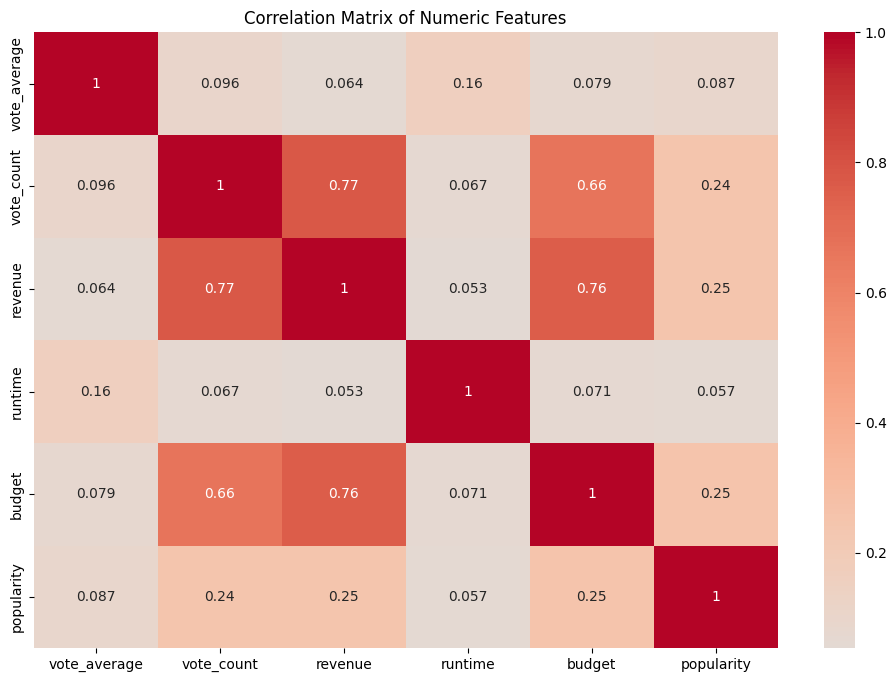

In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].drop(columns=['imdb_rating',"imdb_votes"]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### We also drop imdb_votes (IMDB vote count)
It gives info regarding the IMDB website, which can be correlated with our target varible `imdb_rating`.

It is also highly correlated with `vote_count`

In [9]:
df.drop(columns=['imdb_votes'],inplace=True)

### Data Check

Here we notice a problem not vote_count=0 has a vote_average, which not possible.

In [10]:
# Summary of the issue that vote_count=0 has invalid vote_average
total_movies = len(df)
zero_vote_movies = len(df[df['vote_count']==0])
print(f"\nTotal movies in dataset: {total_movies}")
print(f"Movies with zero votes: {zero_vote_movies}")
print(f"Percentage: {(zero_vote_movies/total_movies*100):.2f}%")

# Distribution of vote_average for zero vote_count
print("\nDistribution of vote_average for movies with zero votes:")
print(df[df['vote_count']==0]['vote_average'].value_counts().sort_index())

# Clean the data
# Set vote_average to 5 where vote_count is 0
# becuase 

# 5.0 represents the true middle of the 0-10 scale
# It's intuitively neutral - neither good nor bad
# Easy to explain and interpret

df.loc[df['vote_count']==0, 'vote_average'] = 5


Total movies in dataset: 420722
Movies with zero votes: 134984
Percentage: 32.08%

Distribution of vote_average for movies with zero votes:
vote_average
0.0     134492
0.5          1
1.0         44
1.5          1
2.0         40
3.0         22
3.5          2
4.0         49
4.5          2
5.0         68
5.5          2
6.0        115
6.5          1
7.0         58
7.5          2
8.0         38
8.5          1
9.0         11
10.0        35
Name: count, dtype: int64


In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(df.drop(columns=['imdb_rating']), df['imdb_rating'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f'Shape of the training set: {X_train.shape}')
print(f'Shape of the validation set: {X_val.shape}')
print(f'Shape of the test set: {X_test.shape}')

Shape of the training set: (336577, 19)
Shape of the validation set: (42072, 19)
Shape of the test set: (42073, 19)


## Target Variable: IMDB Rating

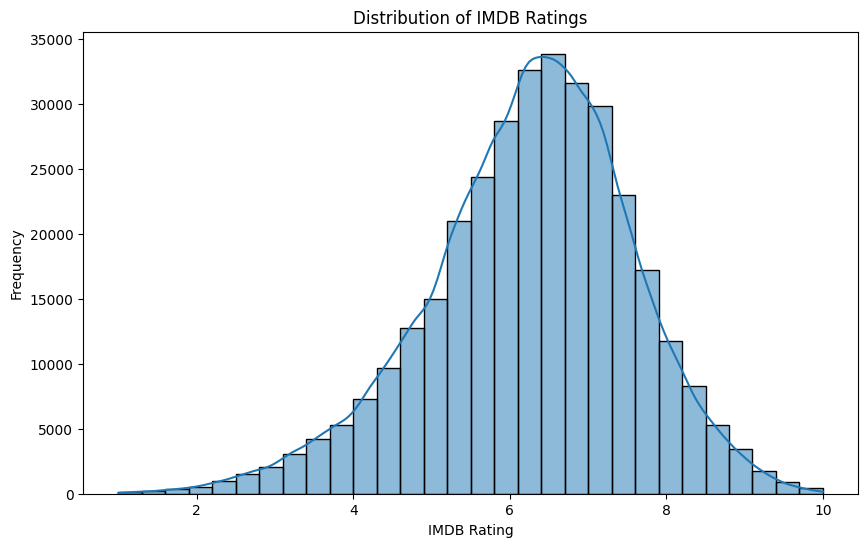

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=30, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

# README for EDA

1. For numerical variables, I normally visualize them with 3 plots (1. histplot 2. log-histplot 3.boxplot/violinplot)

    If the distribution is clear without taking log, we dont need 2. log-histplot
    
    If the distribution has multiple peaks, we use  violinplot over boxplot for 3

2. Mnay numerial variables are extremly skewed, having 0 or low values taking most proportions. For example, "vote_count", "popularity", "revenue" "budget"...... we take `log1p` of them to shift the distribution

## Input variables
### vote_count (Number of votes that contributed to the movie's rating)

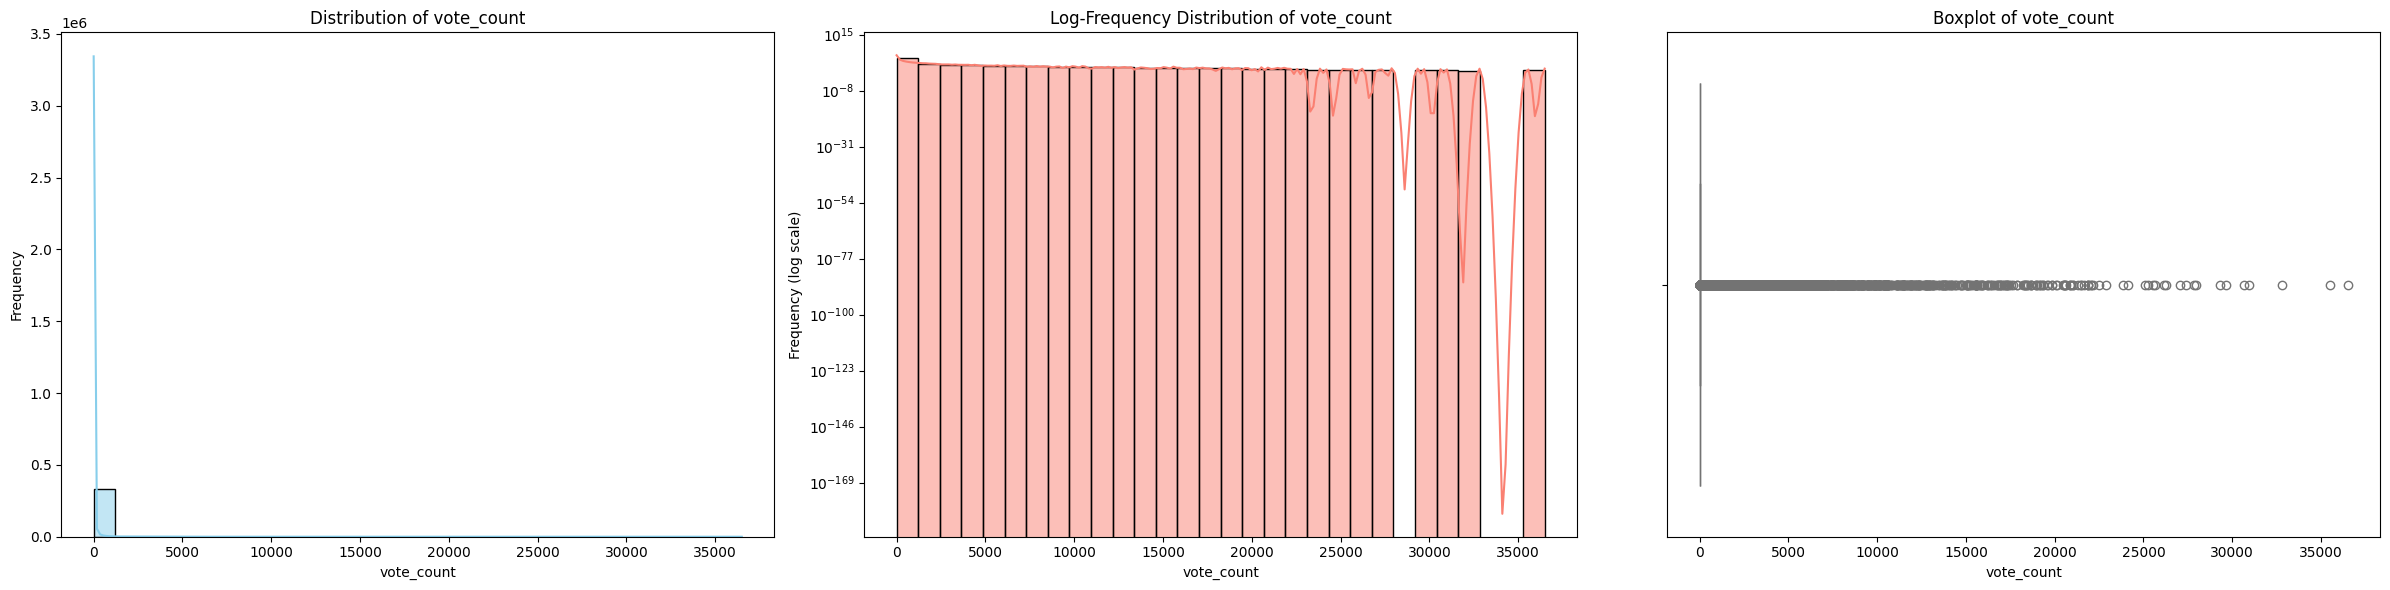

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of vote_count
sns.histplot(X_train['vote_count'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of vote_count')
ax[0].set_xlabel('vote_count')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of vote_count
sns.histplot(X_train['vote_count'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')  # Set y-axis to logarithmic scale
ax[1].set_title('Log-Frequency Distribution of vote_count')
ax[1].set_xlabel('vote_count')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: Boxplot of vote_count
# We use boxplot to identify the outliers
sns.boxplot(x=X_train['vote_count'], ax=ax[2], color='lightgreen')
ax[2].set_title('Boxplot of vote_count')
ax[2].set_xlabel('vote_count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


Due to the extreme skewness of the `vote_count` variable, we will replace it with its logarithmic transformation, `log_vote_count`. This transformation reduces skewness by compressing large values and handling zero counts appropriately using the `log1p` function. By using `log_vote_count` in place of `vote_count`, we aim to normalize the distribution and make the data more suitable for analysis.

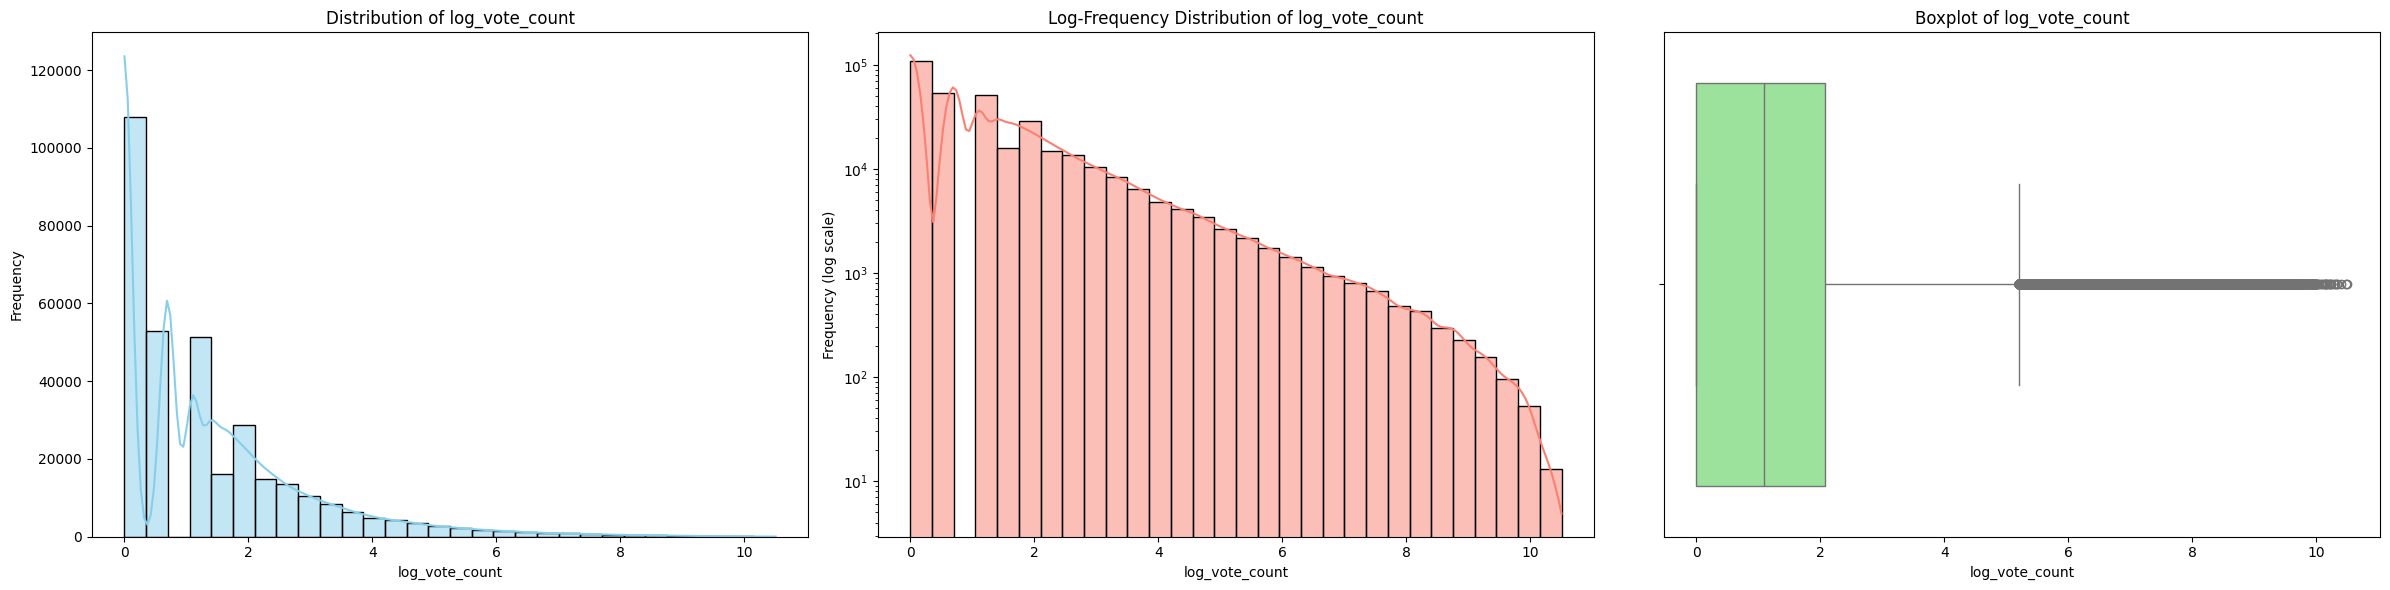

In [14]:
X_train['log_vote_count'] = np.log1p(X_train['vote_count'])
X_train.drop(columns=['vote_count'], inplace=True)

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of log_vote_count
sns.histplot(X_train['log_vote_count'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of log_vote_count')
ax[0].set_xlabel('log_vote_count')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of log_vote_count
sns.histplot(X_train['log_vote_count'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')
ax[1].set_title('Log-Frequency Distribution of log_vote_count')
ax[1].set_xlabel('log_vote_count')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: Boxplot of log_vote_count
# We use boxplot to identify the outliers
sns.boxplot(x=X_train['log_vote_count'], ax=ax[2], color='lightgreen')
ax[2].set_title('Boxplot of log_vote_count')
ax[2].set_xlabel('log_vote_count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


### vote_average (Average rating of the movie on a scale from 0 to 10)

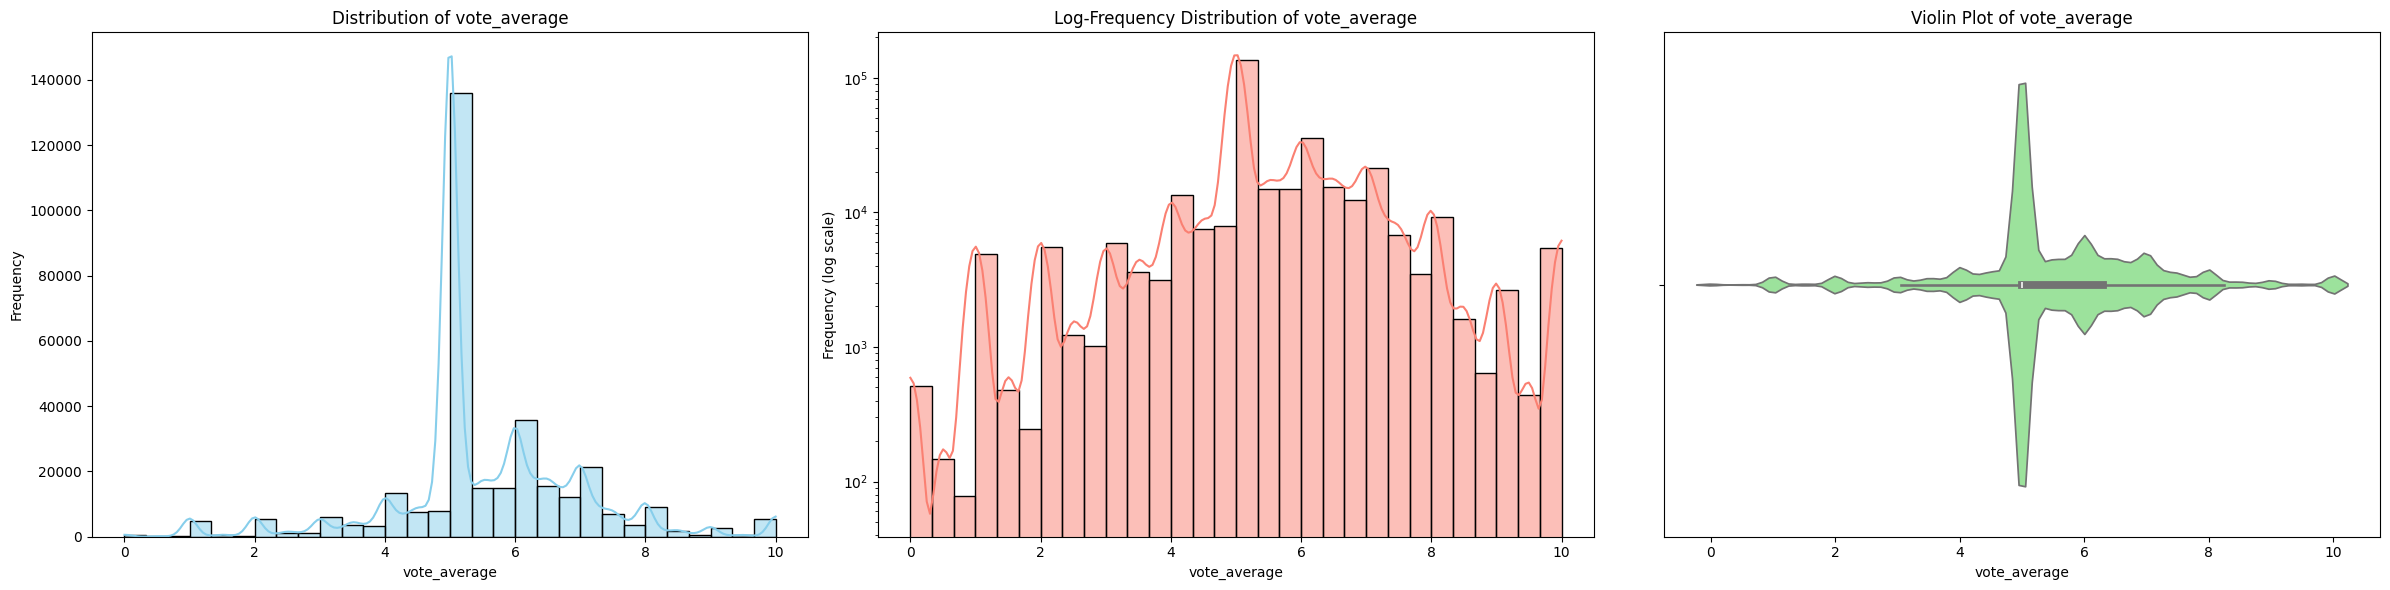

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of vote_average
sns.histplot(X_train['vote_average'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of vote_average')
ax[0].set_xlabel('vote_average')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of vote_average
sns.histplot(X_train['vote_average'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')  # Set y-axis to logarithmic scale
ax[1].set_title('Log-Frequency Distribution of vote_average')
ax[1].set_xlabel('vote_average')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: Violinplot of vote_average
# We use violinplot to visualize the multiple peaks in the distribution of vote_average
sns.violinplot(x=X_train['vote_average'], color='lightgreen', ax=ax[2])
ax[2].set_title('Violin Plot of vote_average')
ax[2].set_xlabel('vote_average')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


Let's examine their distributions together

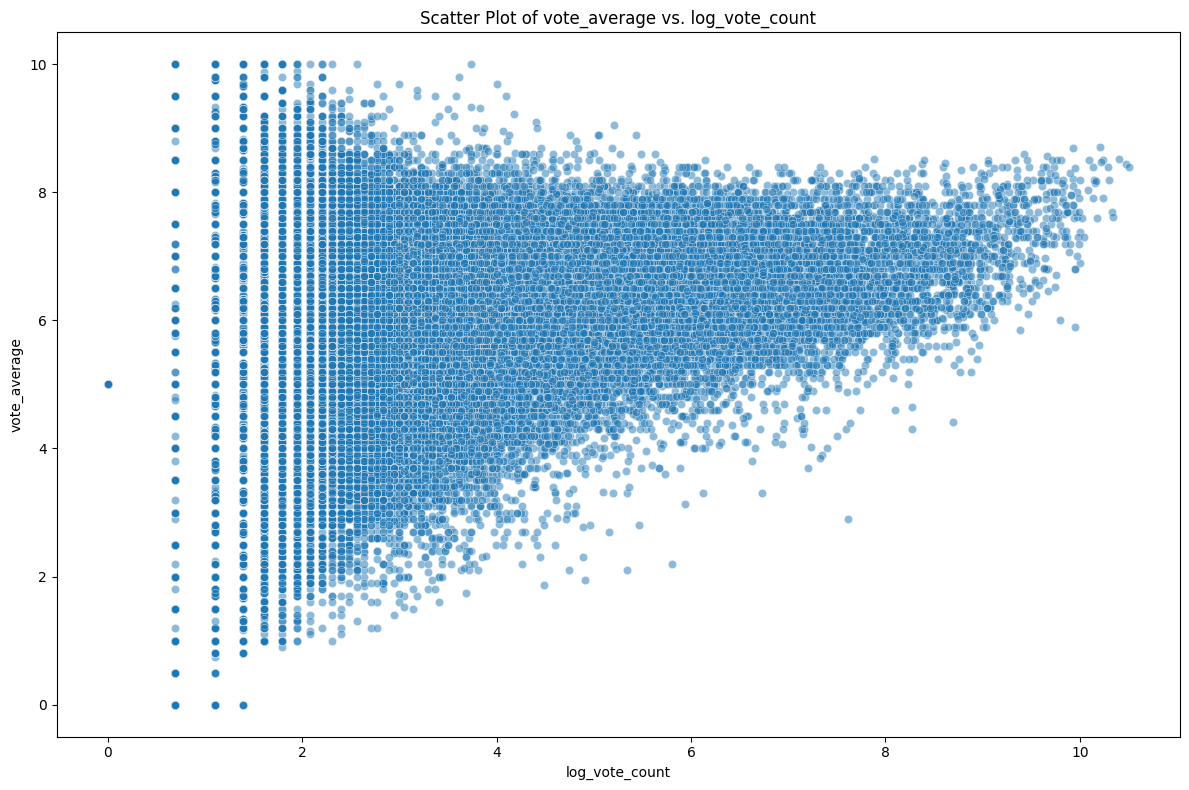

In [16]:
# Scatter Plot with Log Scale
plt.figure(figsize=(12, 8))

sns.scatterplot(x='log_vote_count', y='vote_average', data=X_train, alpha=0.5)
plt.title('Scatter Plot of vote_average vs. log_vote_count')
plt.xlabel('log_vote_count')
plt.ylabel('vote_average')
plt.tight_layout()
plt.show()


### popularity (Popularity score of the movie on TMDB)

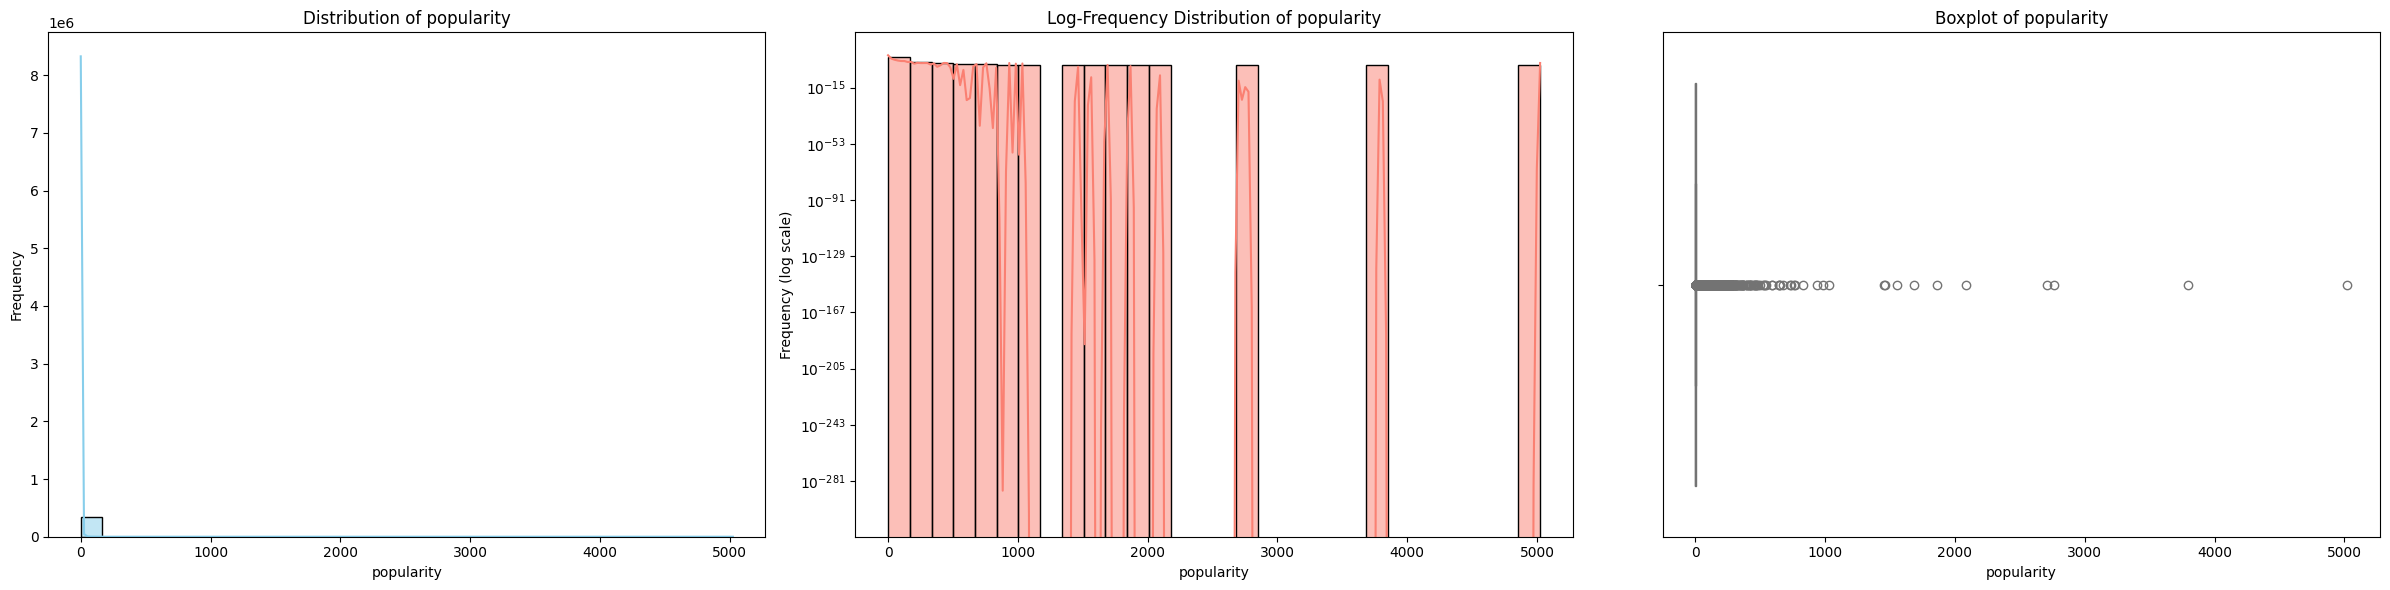

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of popularity
sns.histplot(X_train['popularity'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of popularity')
ax[0].set_xlabel('popularity')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of popularity
sns.histplot(X_train['popularity'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')  # Set y-axis to logarithmic scale
ax[1].set_title('Log-Frequency Distribution of popularity')
ax[1].set_xlabel('popularity')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: Boxplot of popularity
# We use boxplot to identify the outliers
sns.boxplot(x=X_train['popularity'], ax=ax[2], color='lightgreen')
ax[2].set_title('Boxplot of popularity')
ax[2].set_xlabel('popularity')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


similar to vote_count, we can see that popularity also has a long tail distribution. We can apply the same log transformation to popularity as well.

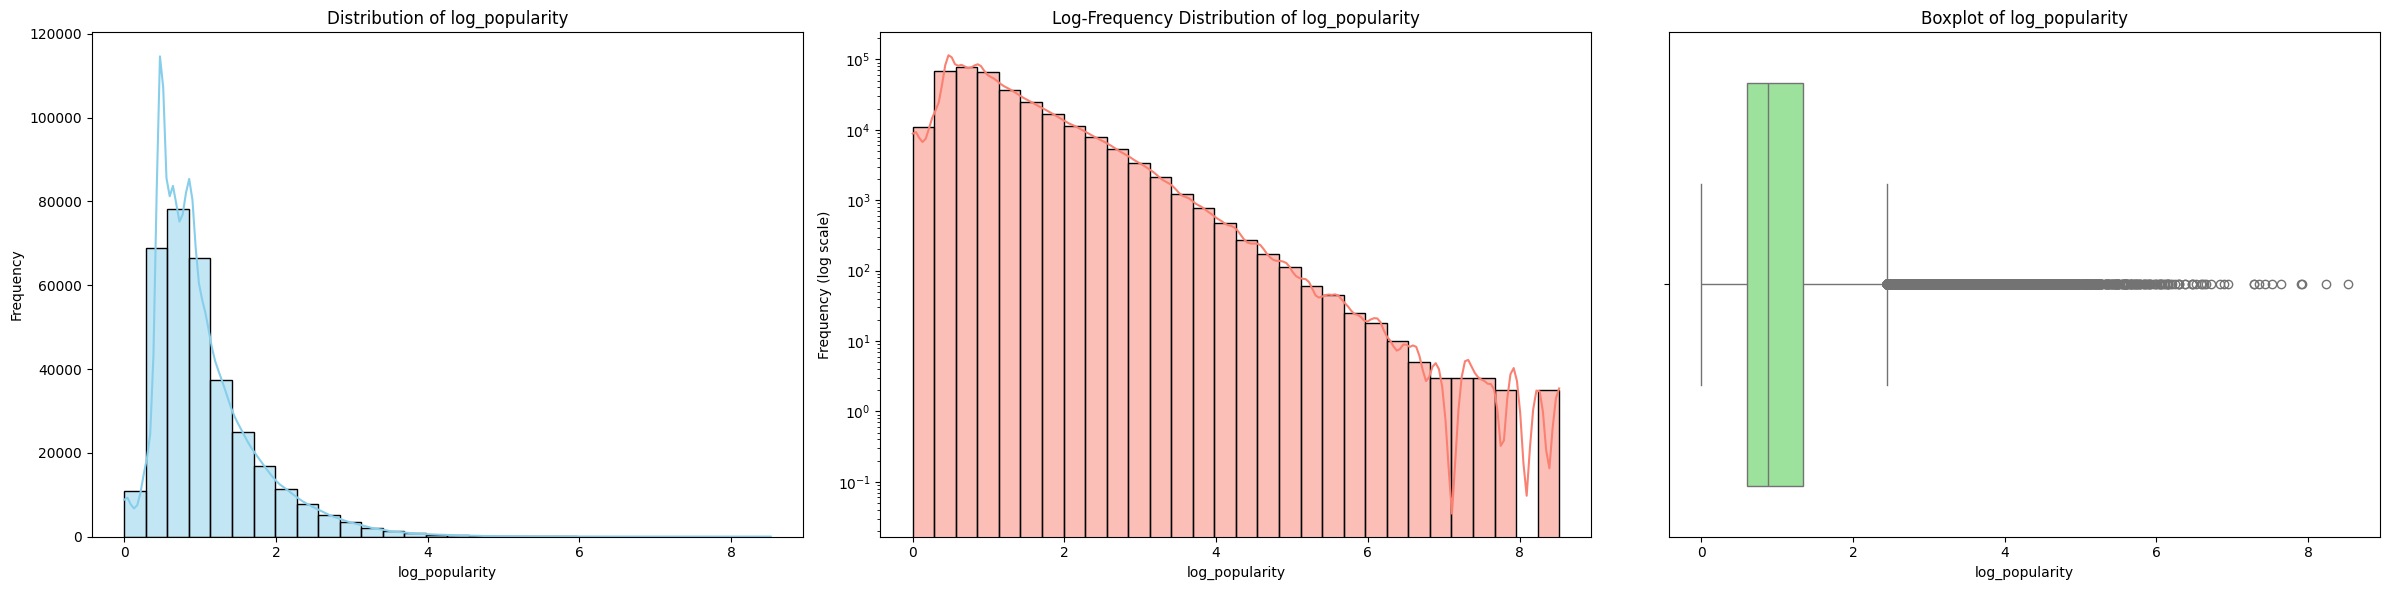

In [18]:
X_train['log_popularity'] = np.log1p(X_train['popularity'])
X_train.drop(columns=['popularity'], inplace=True)

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of log_popularity
sns.histplot(X_train['log_popularity'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of log_popularity')
ax[0].set_xlabel('log_popularity')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of log_popularity
sns.histplot(X_train['log_popularity'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')
ax[1].set_title('Log-Frequency Distribution of log_popularity')
ax[1].set_xlabel('log_popularity')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: Boxplot of log_popularity
# We use boxplot to identify the outliers
sns.boxplot(x=X_train['log_popularity'], ax=ax[2], color='lightgreen')
ax[2].set_title('Boxplot of log_popularity')
ax[2].set_xlabel('log_popularity')

plt.tight_layout()

# Display the plots
plt.show()


### budget and revenue

#### revenue (Box office earnings of the movie)

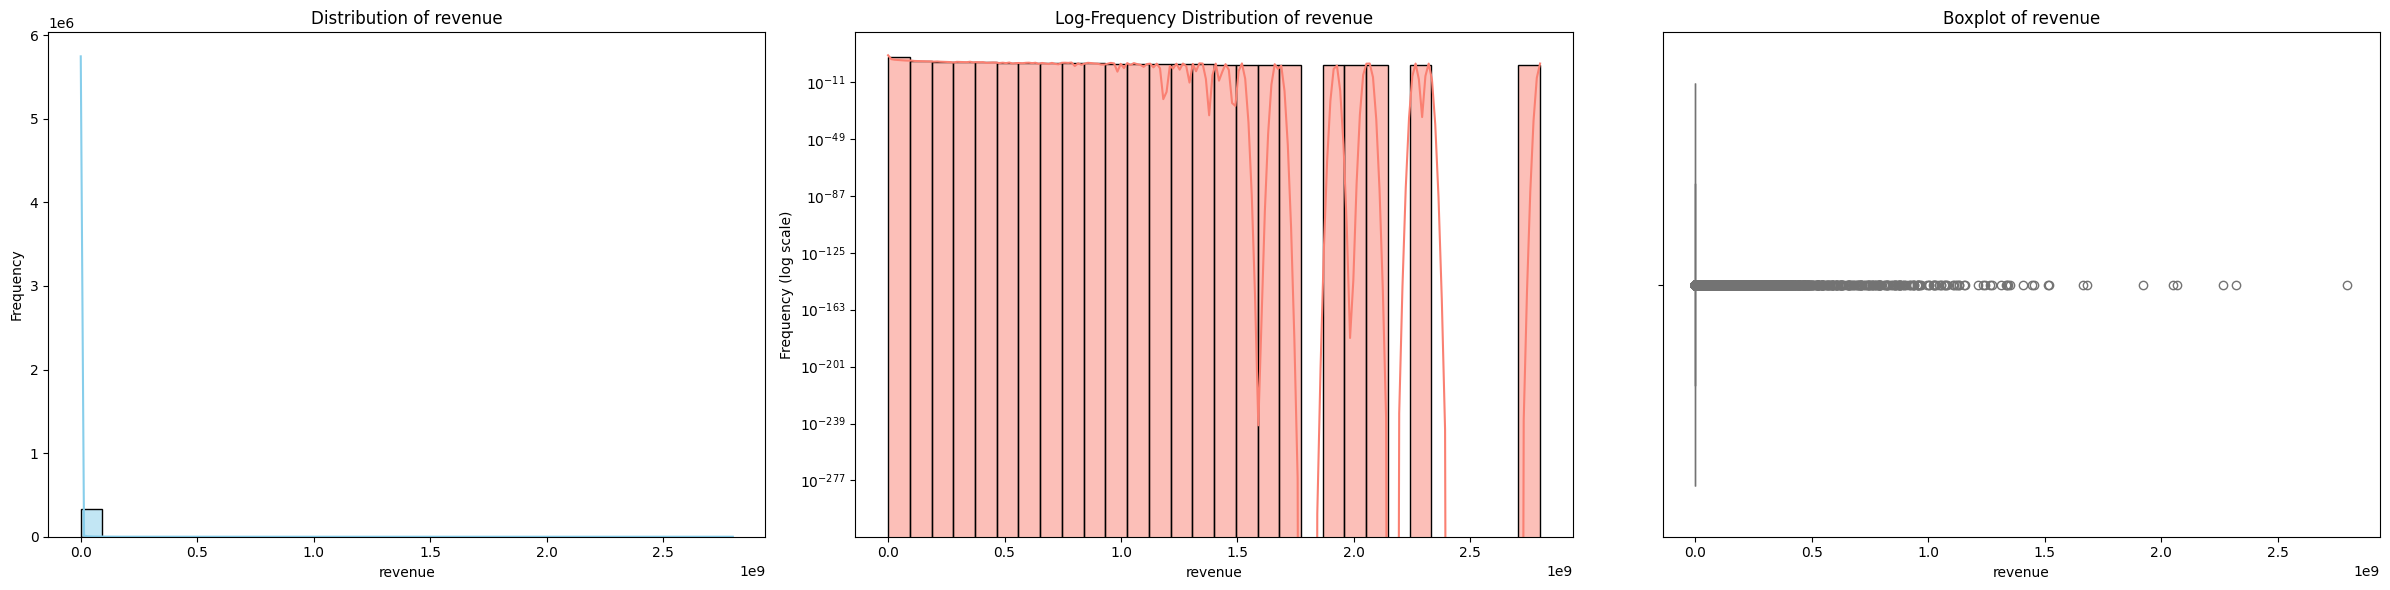

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of revenue
sns.histplot(X_train['revenue'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of revenue')
ax[0].set_xlabel('revenue')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of revenue
sns.histplot(X_train['revenue'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')  # Set y-axis to logarithmic scale
ax[1].set_title('Log-Frequency Distribution of revenue')
ax[1].set_xlabel('revenue')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: Boxplot of revenue
# We use boxplot to identify the outliers
sns.boxplot(x=X_train['revenue'], ax=ax[2], color='lightgreen')
ax[2].set_title('Boxplot of revenue')
ax[2].set_xlabel('revenue')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


similar to vote_count, we can see that popularity also has a long tail distribution. We can apply the same log transformation as well.

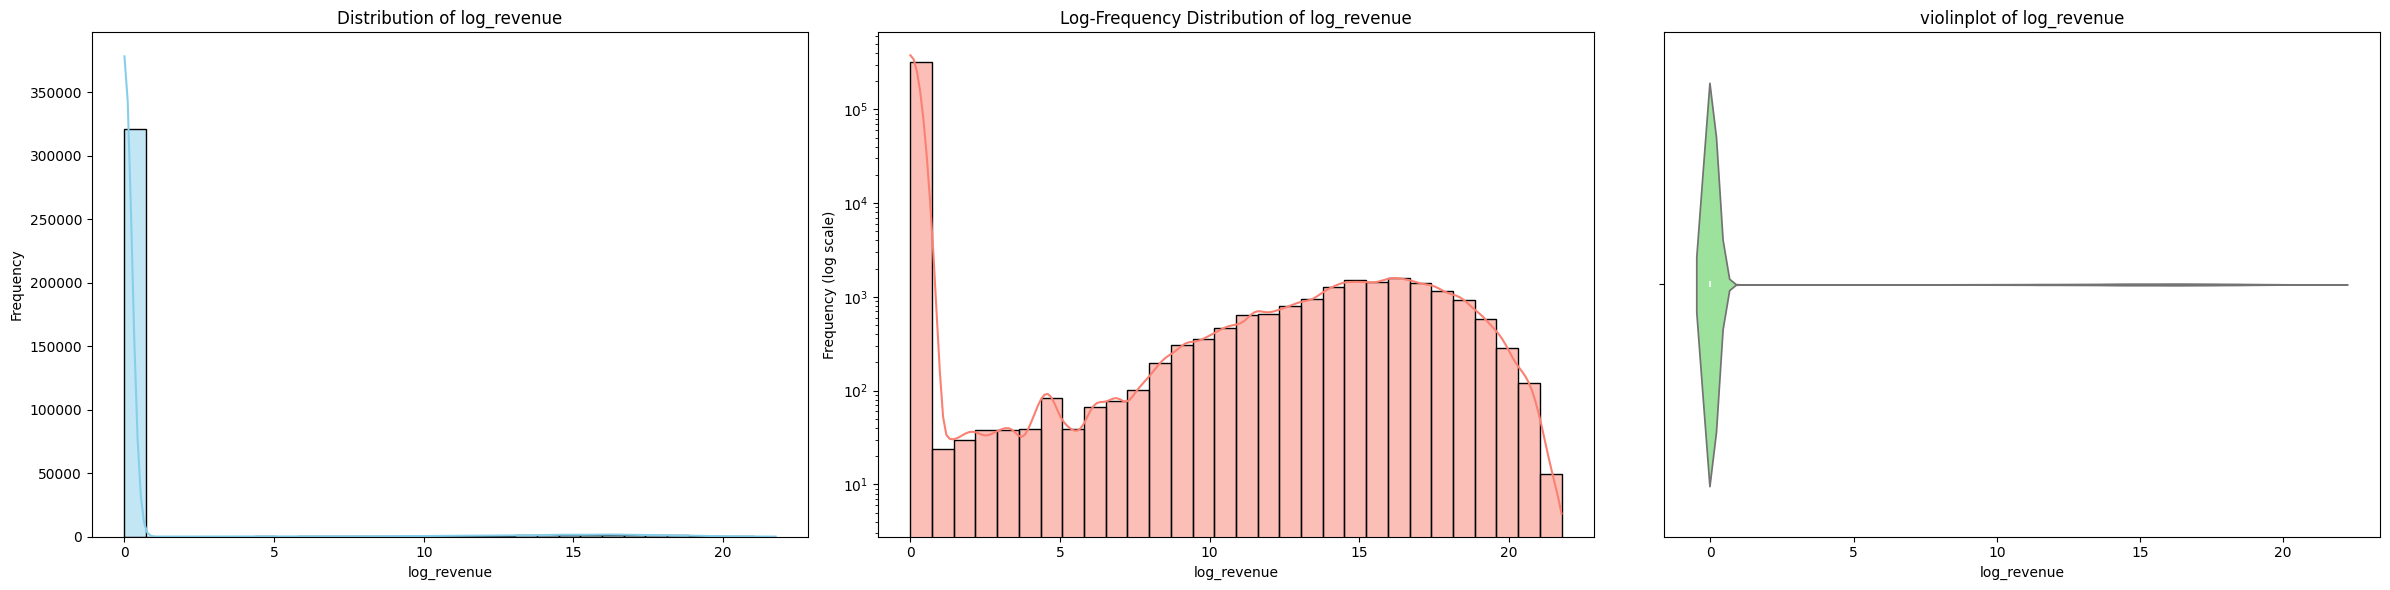

In [20]:
X_train['log_revenue'] = np.log1p(X_train['revenue'])

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of log_revenue
sns.histplot(X_train['log_revenue'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of log_revenue')
ax[0].set_xlabel('log_revenue')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of log_revenue
sns.histplot(X_train['log_revenue'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')
ax[1].set_title('Log-Frequency Distribution of log_revenue')
ax[1].set_xlabel('log_revenue')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: Boxplot of log_revenue
# We use boxplot to identify the outliers
sns.violinplot(x=X_train['log_revenue'], ax=ax[2], color='lightgreen')
ax[2].set_title('violinplot of log_revenue')
ax[2].set_xlabel('log_revenue')

plt.tight_layout()

# Display the plots
plt.show()


#### budget (Financial budget allocated for the movie production)

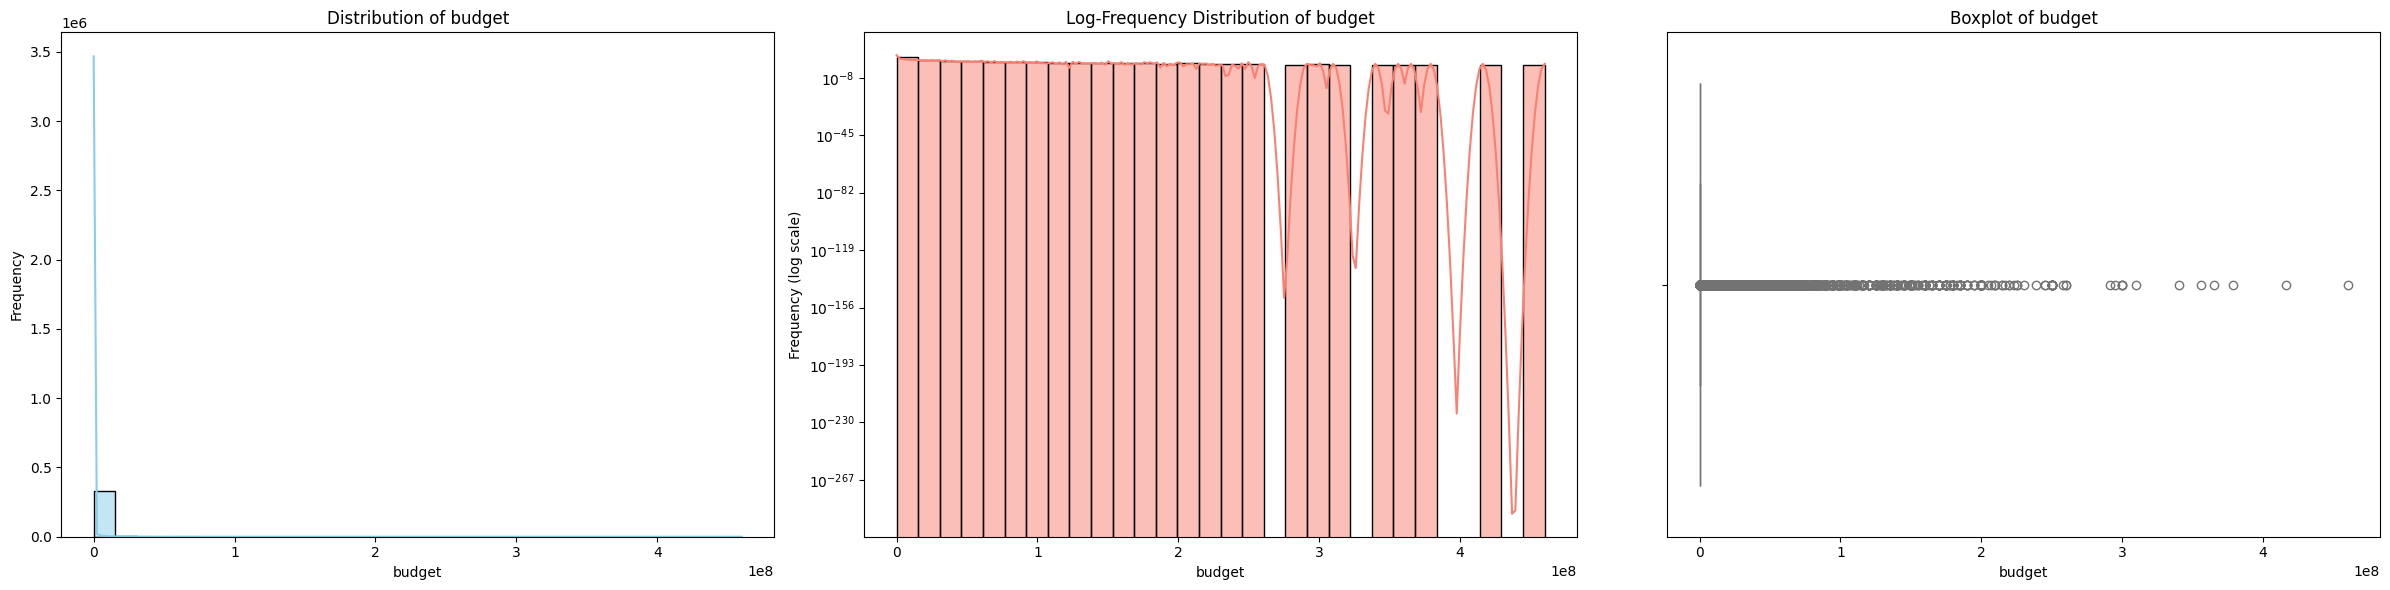

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of budget
sns.histplot(X_train['budget'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of budget')
ax[0].set_xlabel('budget')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of budget
sns.histplot(X_train['budget'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')  # Set y-axis to logarithmic scale
ax[1].set_title('Log-Frequency Distribution of budget')
ax[1].set_xlabel('budget')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: Boxplot of budget
# We use boxplot to identify the outliers
sns.boxplot(x=X_train['budget'], ax=ax[2], color='lightgreen')
ax[2].set_title('Boxplot of budget')
ax[2].set_xlabel('budget')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


similar to vote_count, we can see that popularity also has a long tail distribution. We can apply the same log transformation as well.

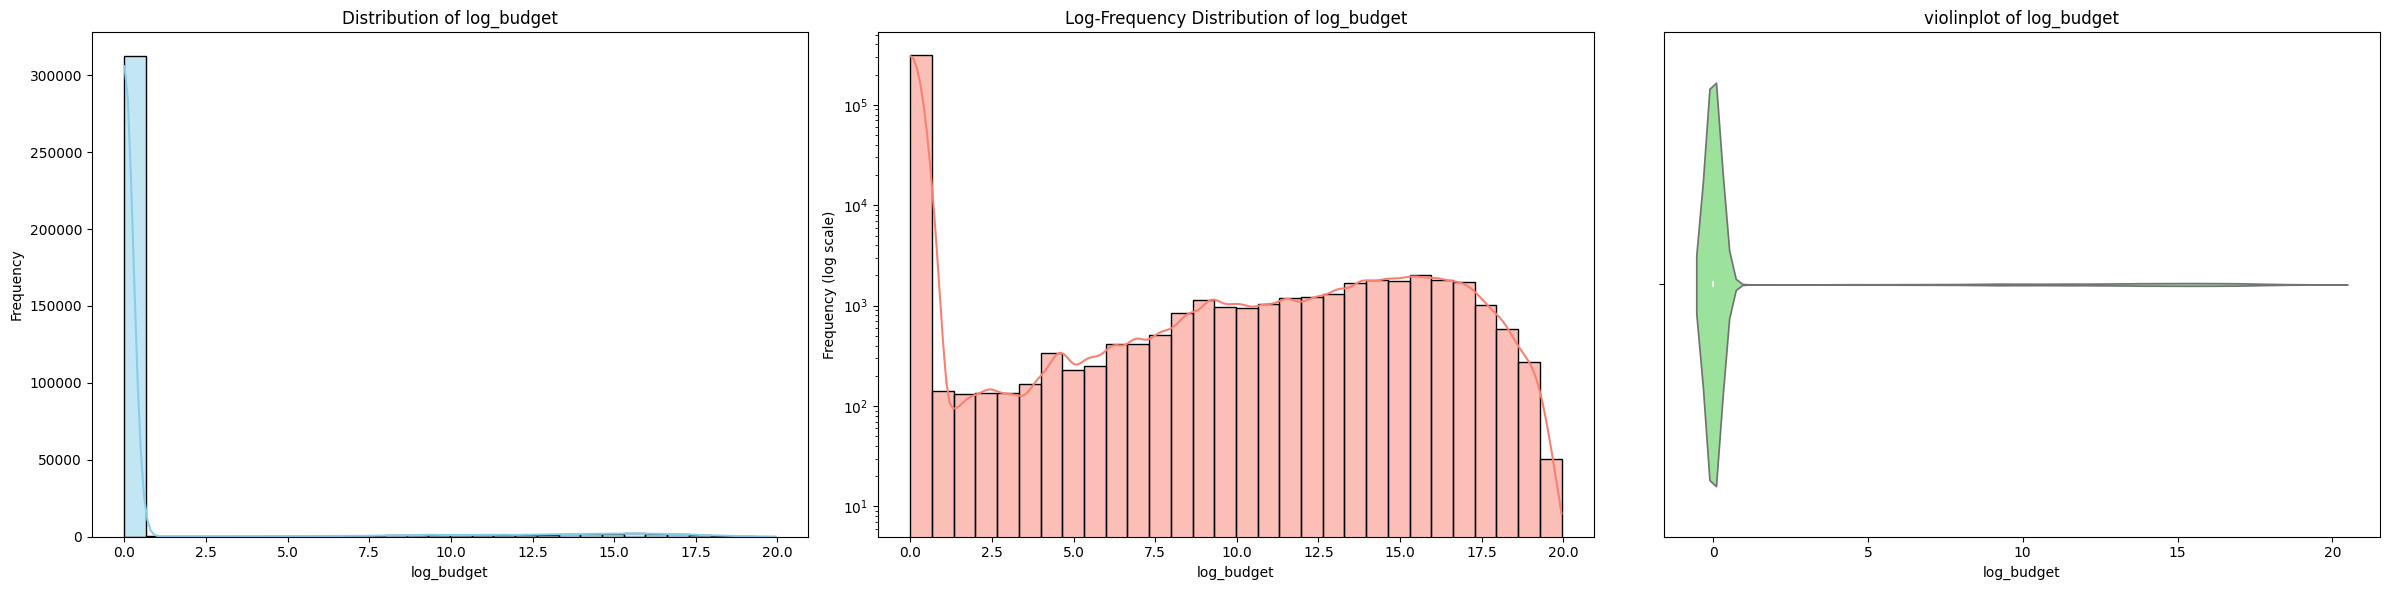

In [22]:
X_train['log_budget'] = np.log1p(X_train['budget'])

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of log_budget
sns.histplot(X_train['log_budget'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of log_budget')
ax[0].set_xlabel('log_budget')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of log_budget
sns.histplot(X_train['log_budget'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')
ax[1].set_title('Log-Frequency Distribution of log_budget')
ax[1].set_xlabel('log_budget')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: Boxplot of log_budget
# We use violinplot to identify the outliers
sns.violinplot(x=X_train['log_budget'], ax=ax[2], color='lightgreen',inner='box')
ax[2].set_title('violinplot of log_budget')
ax[2].set_xlabel('log_budget')

plt.tight_layout()

# Display the plots
plt.show()


These two varibales seems to be highly skewed even log transformation is not helping much. They are highly-correlated as shown before, and both correlate with "vote_count"

We instead try to engineer some useful features from them and drop them.

#### New featrue: `log_roi`
 (log Return on Investment, as a measure to evaluate profit, the higher the more profitable)

log(revenue/budget) = log(revenue) - log(budget)

log((revenue - budget)/budget + 1) = log(revenue/budget)
                                  = log(revenue) - log(budget)

In [23]:
X_train['log_roi'] = X_train['log_revenue'] - X_train['log_budget']

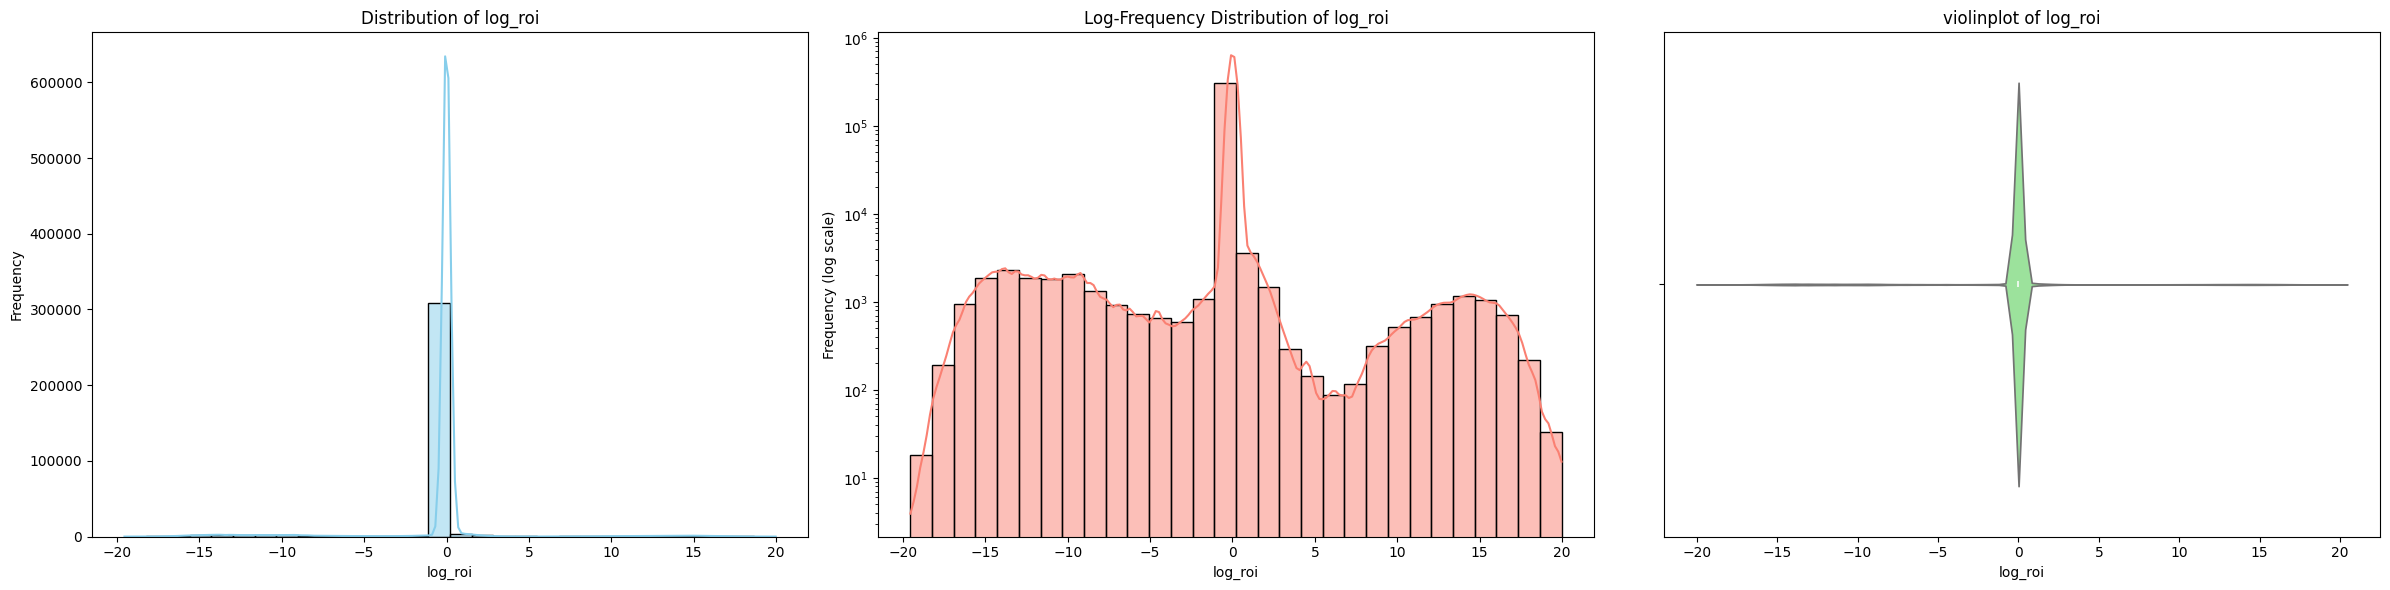

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of log_roi
sns.histplot(X_train['log_roi'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of log_roi')
ax[0].set_xlabel('log_roi')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of log_roi
sns.histplot(X_train['log_roi'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')  # Set y-axis to logarithmic scale
ax[1].set_title('Log-Frequency Distribution of log_roi')
ax[1].set_xlabel('log_roi')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: violinplot of log_roi
# We use boxplot to identify the outliers
sns.violinplot(x=X_train['log_roi'], ax=ax[2], color='lightgreen')
ax[2].set_title('violinplot of log_roi')
ax[2].set_xlabel('log_roi')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [25]:
X_train.drop(columns=['budget', 'revenue',"log_budget","log_revenue"], inplace=True)

### runtime (Duration of the movie in minutes)

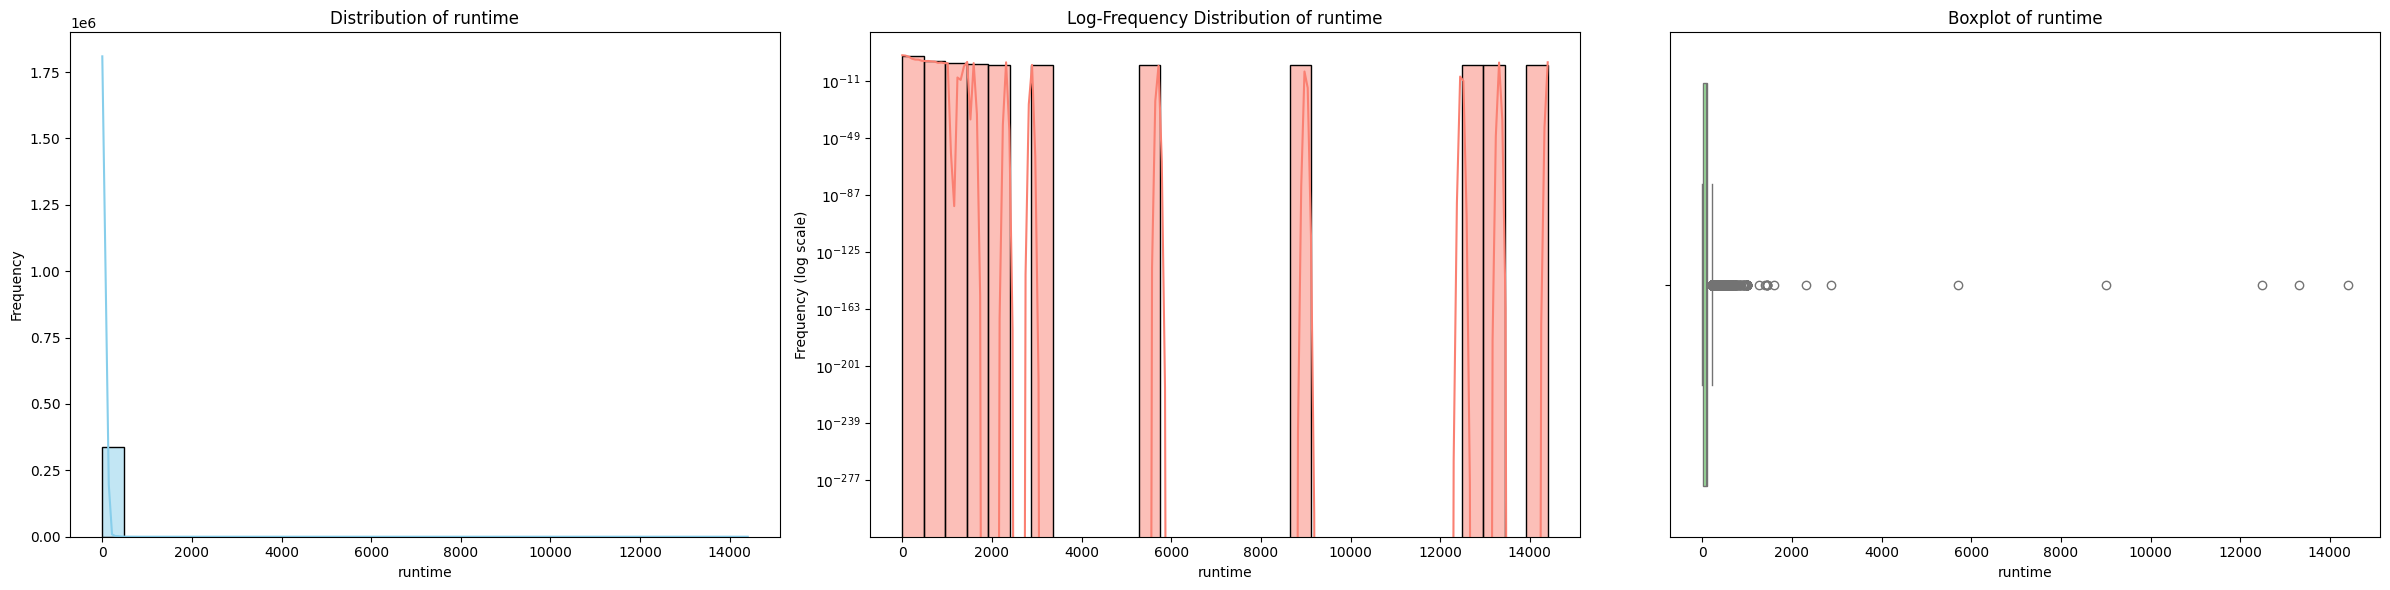

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of runtime
sns.histplot(X_train['runtime'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of runtime')
ax[0].set_xlabel('runtime')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of runtime
sns.histplot(X_train['runtime'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')  # Set y-axis to logarithmic scale
ax[1].set_title('Log-Frequency Distribution of runtime')
ax[1].set_xlabel('runtime')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: Boxplot of runtime
# We use boxplot to identify the outliers
sns.boxplot(x=X_train['runtime'], ax=ax[2], color='lightgreen')
ax[2].set_title('Boxplot of runtime')
ax[2].set_xlabel('runtime')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


similar to vote_count, we can see that popularity also has a long tail distribution. We can apply the same log transformation as well.

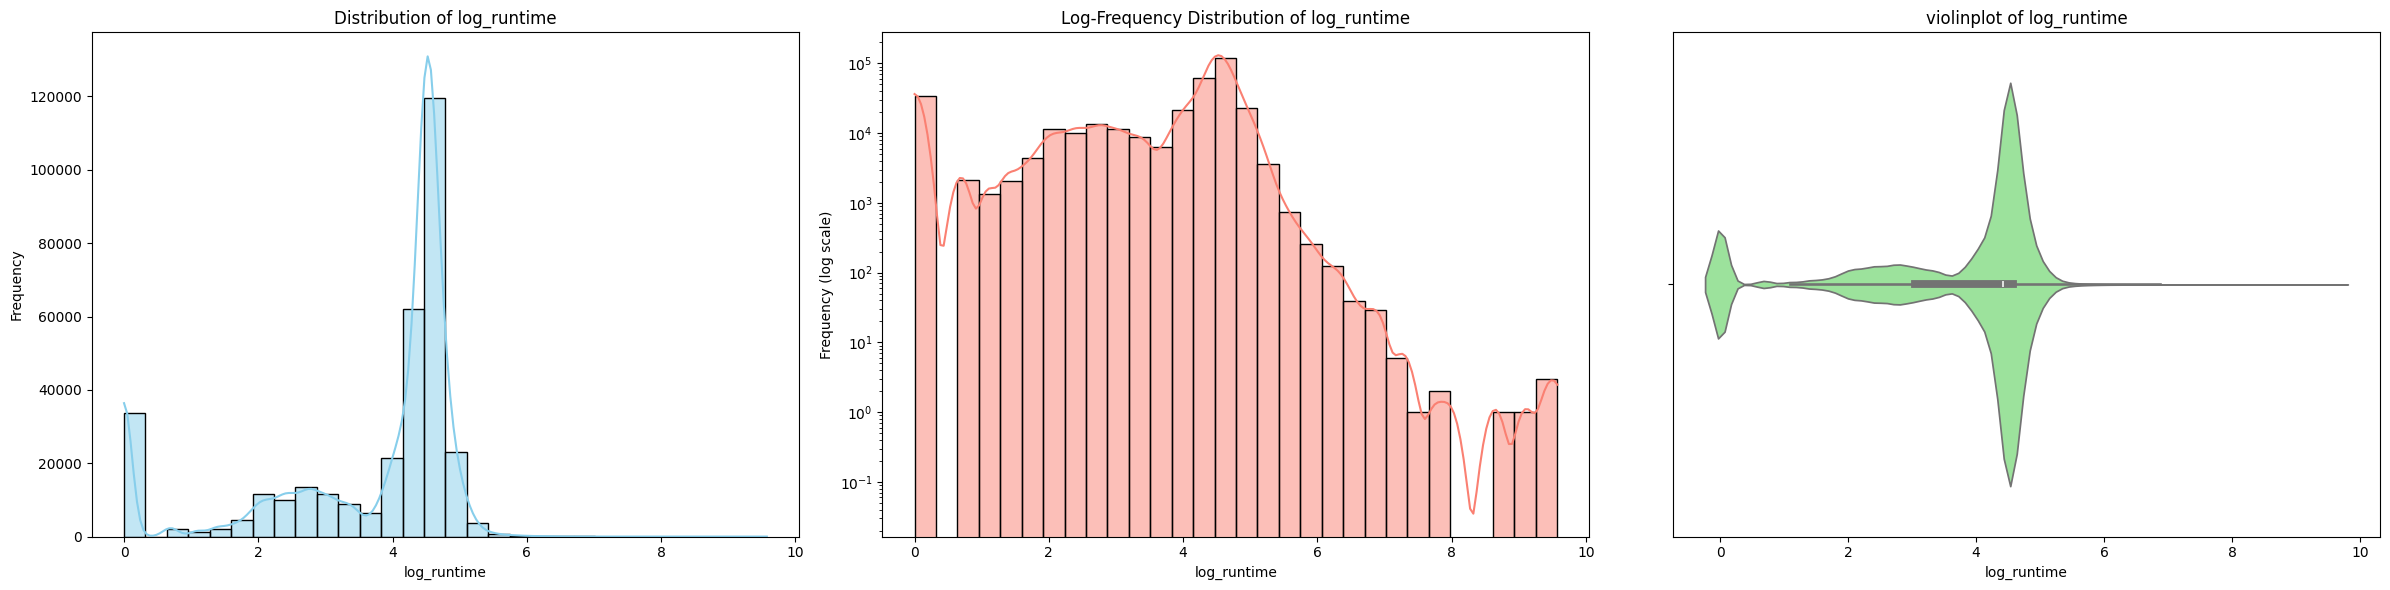

In [27]:
X_train['log_runtime'] = np.log1p(X_train['runtime'])
X_train.drop(columns=['runtime'], inplace=True)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of log_runtime
sns.histplot(X_train['log_runtime'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of log_runtime')
ax[0].set_xlabel('log_runtime')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of log_runtime
sns.histplot(X_train['log_runtime'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')
ax[1].set_title('Log-Frequency Distribution of log_runtime')
ax[1].set_xlabel('log_runtime')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: Boxplot of log_runtime
# We use boxplot to identify the outliers
sns.violinplot(x=X_train['log_runtime'], ax=ax[2], color='lightgreen')
ax[2].set_title('violinplot of log_runtime')
ax[2].set_xlabel('log_runtime')

plt.tight_layout()

# Display the plots
plt.show()


### release_date (Date when the movie was officially released)

We divide this into two parts:

#### release_year

In [28]:
X_train['release_date'] = pd.to_datetime(X_train['release_date'])
X_train['release_year'] = X_train['release_date'].dt.year

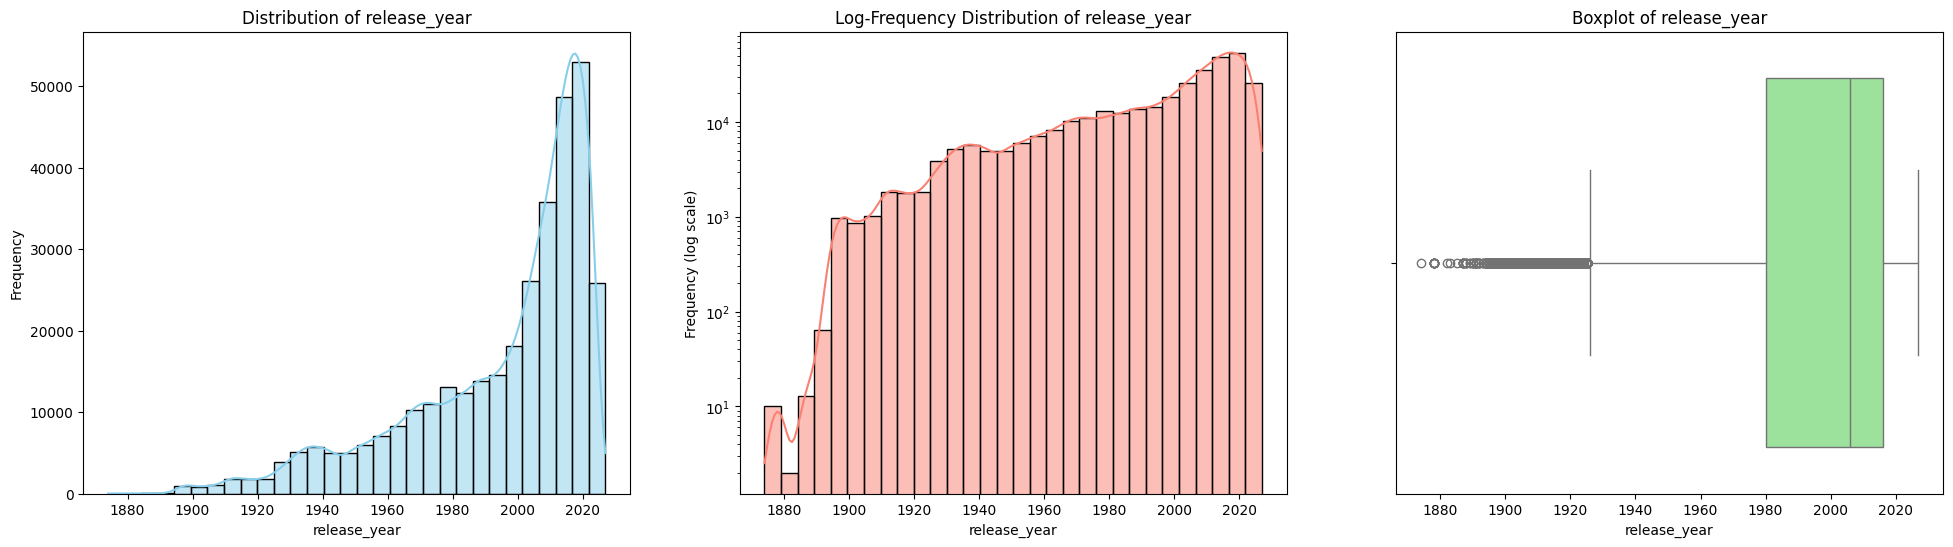

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of release_year
sns.histplot(X_train['release_year'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of release_year')
ax[0].set_xlabel('release_year')
ax[0].set_ylabel('Frequency')

# Second subplot: Logarithmic Frequency Distribution of release_year
sns.histplot(X_train['release_year'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_yscale('log')  # Set y-axis to logarithmic scale
ax[1].set_title('Log-Frequency Distribution of release_year')
ax[1].set_xlabel('release_year')
ax[1].set_ylabel('Frequency (log scale)')

# Third subplot: Boxplot of release_year
# We use boxplot to identify the outliers
sns.boxplot(x=X_train['release_year'], ax=ax[2], color='lightgreen')
ax[2].set_title('Boxplot of release_year')
ax[2].set_xlabel('release_year')


# Display the plots
plt.show()


#### release_month

In [30]:
X_train['release_month'] = X_train['release_date'].dt.month
X_train.drop(columns=['release_date'], inplace=True)

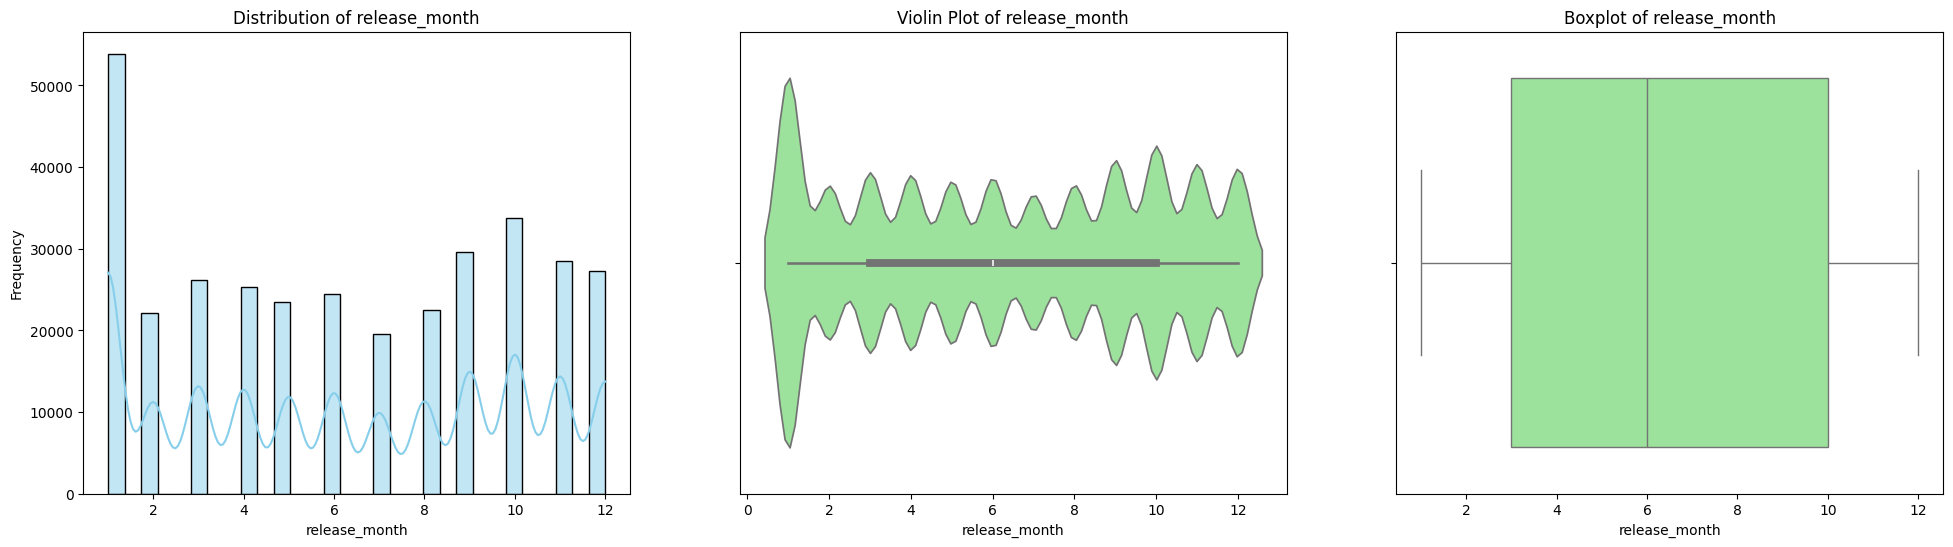

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

# First subplot: Histogram of release_month
sns.histplot(X_train['release_month'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of release_month')
ax[0].set_xlabel('release_month')
ax[0].set_ylabel('Frequency')

# Second subplot: Violinplot of release_month
# We use violinplot to visualize the multiple peaks in the distribution of release_month
sns.violinplot(x=X_train['release_month'], color='lightgreen', ax=ax[1])
ax[1].set_title('Violin Plot of release_month')
ax[1].set_xlabel('release_month')

# Third subplot: Boxplot of release_month
# We use boxplot to identify the outliers
sns.boxplot(x=X_train['release_month'], ax=ax[2], color='lightgreen')
ax[2].set_title('Boxplot of release_month')
ax[2].set_xlabel('release_month')


# Display the plots
plt.show()


#### New feature: movie_age (current_year(2024)- release_year)

In [32]:
X_train['movie_age'] = 2024 - X_train['release_year']

### status (Current release status of the movie (e.g., Released, Post Production))



In [33]:
X_train.status.value_counts()

status
Released           336532
Post Production        28
In Production          13
Planned                 4
Name: count, dtype: int64

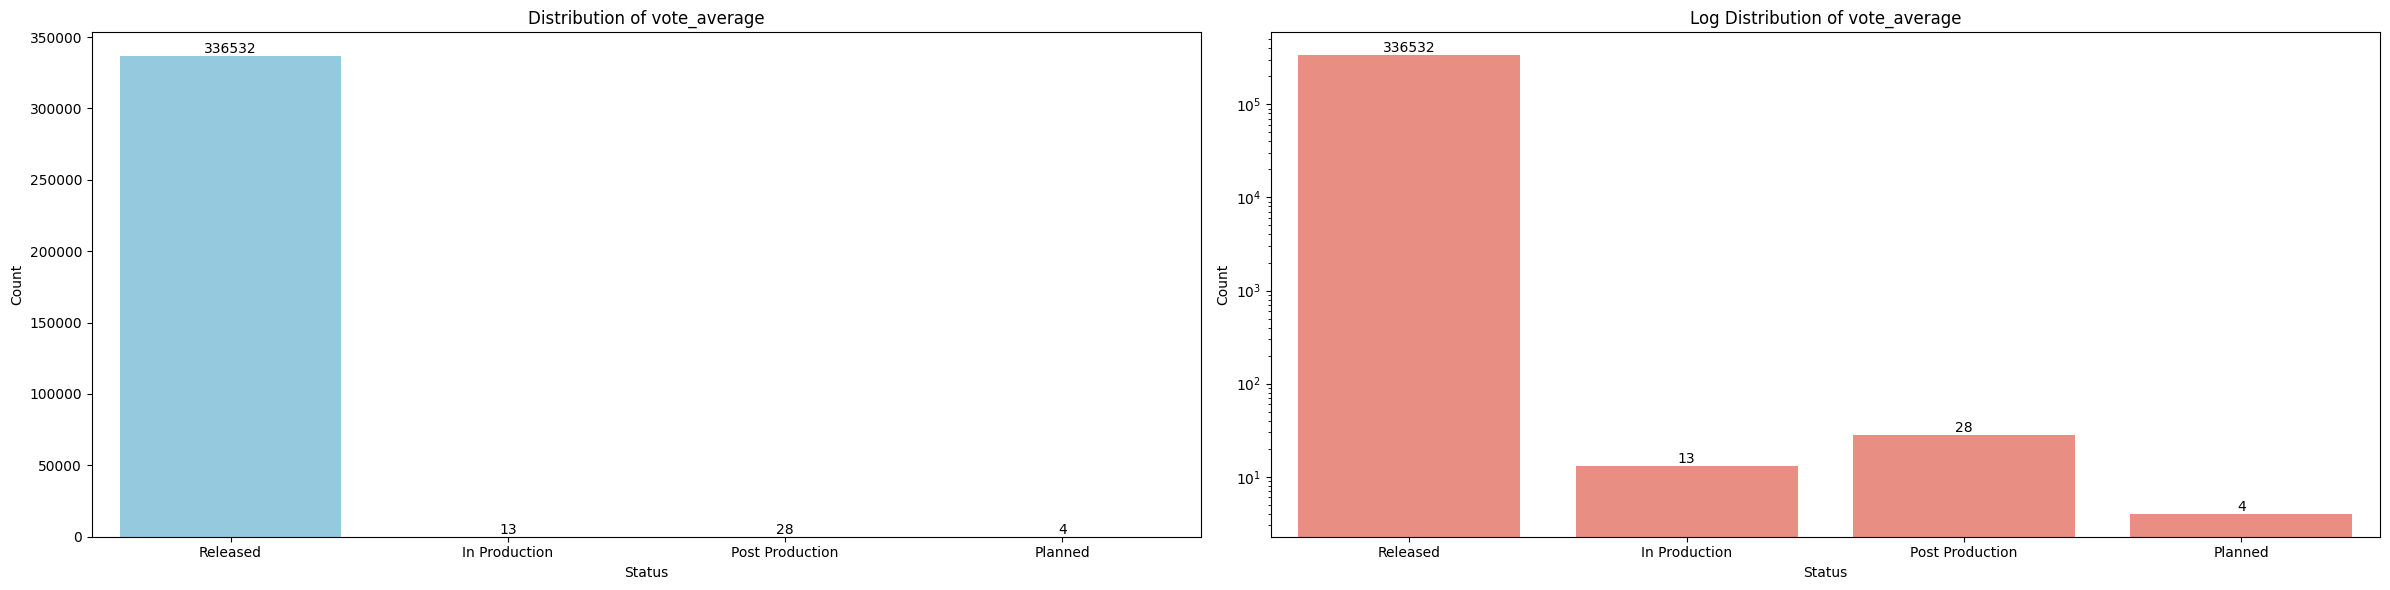

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

# First subplot: Histogram of Status
status_counts = sns.countplot(x=X_train['status'], ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of vote_average')
ax[0].set_xlabel('Status')
ax[0].set_ylabel('Count')

# Add count values on the bars for first subplot
for p in status_counts.patches:
    ax[0].text(p.get_x() + p.get_width()/2.,
               p.get_height(),
               int(p.get_height()),  # Convert to integer for cleaner display
               ha='center',
               va='bottom')

# Second subplot: Logarithmic Frequency Distribution of Status
status_counts_log = sns.countplot(x=X_train['status'], ax=ax[1], color='salmon')
ax[1].set_title('Log Distribution of vote_average')
ax[1].set_xlabel('Status')
ax[1].set_yscale('log')
ax[1].set_ylabel('Count')

# Add count values on the bars for second subplot
for p in status_counts_log.patches:
    ax[1].text(p.get_x() + p.get_width()/2.,
               p.get_height(),
               int(p.get_height()),
               ha='center',
               va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

## Comparison with Target Variable (IMDB Rating)

In [35]:
# Combine X_train and y_train for the analysis
train_df = X_train.copy()
train_df['imdb_rating'] = y_train

### numerical features

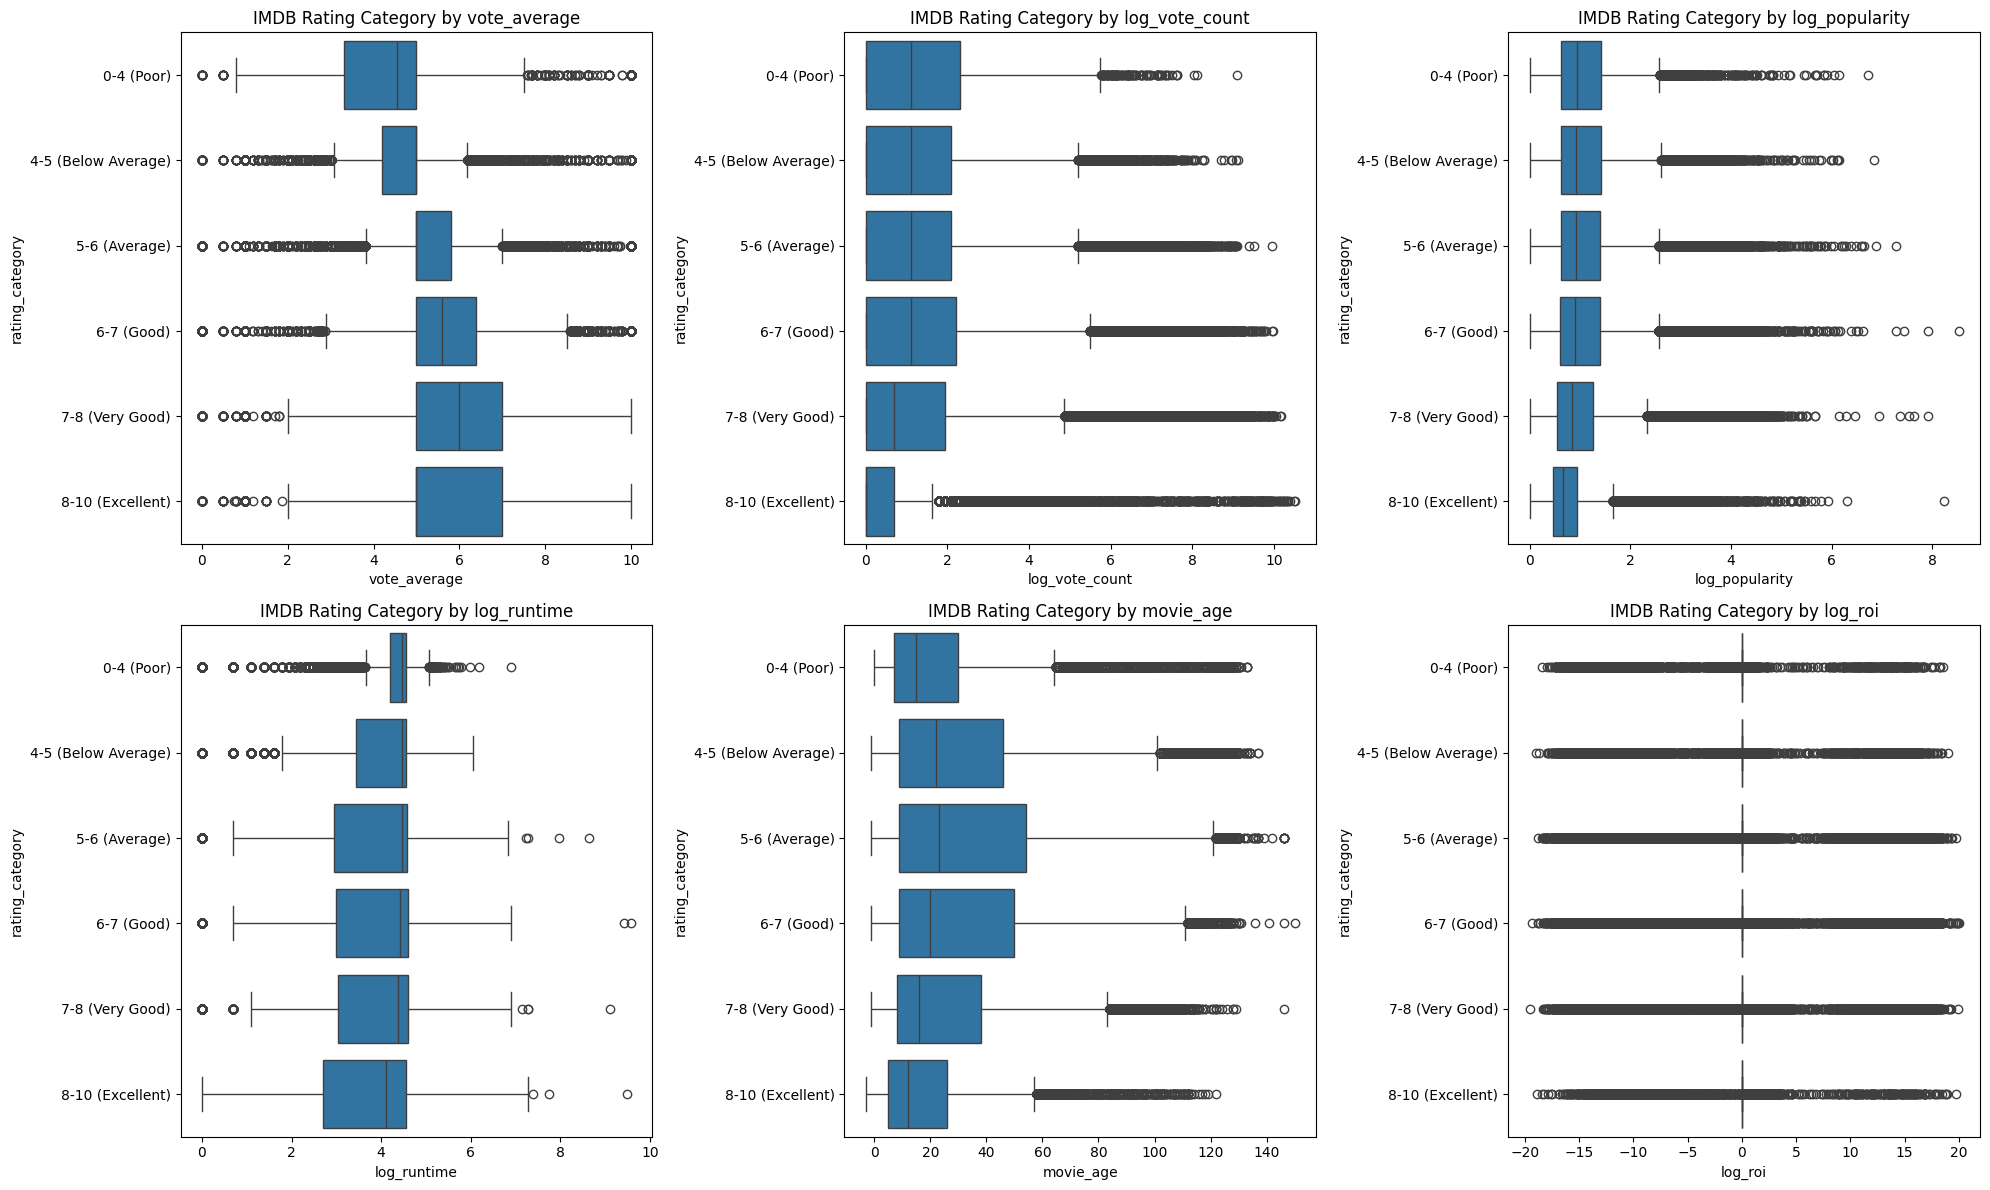

In [36]:
numerical_features = ['vote_average', 'log_vote_count', 'log_popularity', 'log_runtime', 'movie_age',"log_roi"]
# Define ordered categories
rating_categories = ['0-4 (Poor)', '4-5 (Below Average)', '5-6 (Average)', 
                    '6-7 (Good)', '7-8 (Very Good)', '8-10 (Excellent)']

# Create ordered categorical type
def get_rating_category(rating):
    if rating < 4:
        return '0-4 (Poor)'
    elif rating < 5:
        return '4-5 (Below Average)'
    elif rating < 6:
        return '5-6 (Average)'
    elif rating < 7:
        return '6-7 (Good)'
    elif rating < 8:
        return '7-8 (Very Good)'
    else:
        return '8-10 (Excellent)'

train_df['rating_category'] = pd.Categorical(
    train_df['imdb_rating'].apply(get_rating_category),
    categories=rating_categories,
    ordered=True
)

# Rest of the visualization code remains the same
# The categories will now show actual rating ranges which are more meaningful

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    sns.boxplot(data=train_df, y='rating_category', x=feature, ax=axes[idx])
    axes[idx].set_title(f'IMDB Rating Category by {feature}')

plt.tight_layout()
plt.show()


1. **vote_average**: Shows strong positive correlation with IMDB rating
   - Clear upward trend across rating categories
   - Makes sense as both are rating metrics

2. **log_vote_count**: Shows interesting pattern
   - Higher-rated movies tend to have more votes
   - Excellent movies (8-10) show high vote counts
   - Poor movies have wider spread in vote counts

3. **log_popularity**: Similar pattern to vote_count
   - Better-rated movies tend to be more popular
   - More variability in higher rating categories

4. **log_runtime**: Shows slight positive trend
   - Better-rated movies tend to be slightly longer
   - Clear upward trend in median runtime
   - More consistent length in higher ratings

5. **movie_age**: Shows interesting pattern
   - Older movies tend to have more extreme ratings
   - Newer movies cluster more in middle ratings
   - Possible vintage bias or survival bias

6. **log_roi**: Not much differentiation
   - Similar distributions across rating categories
   - Suggests ROI might not be a strong predictor of rating
   - Many outliers in all categories


### Average rating by year


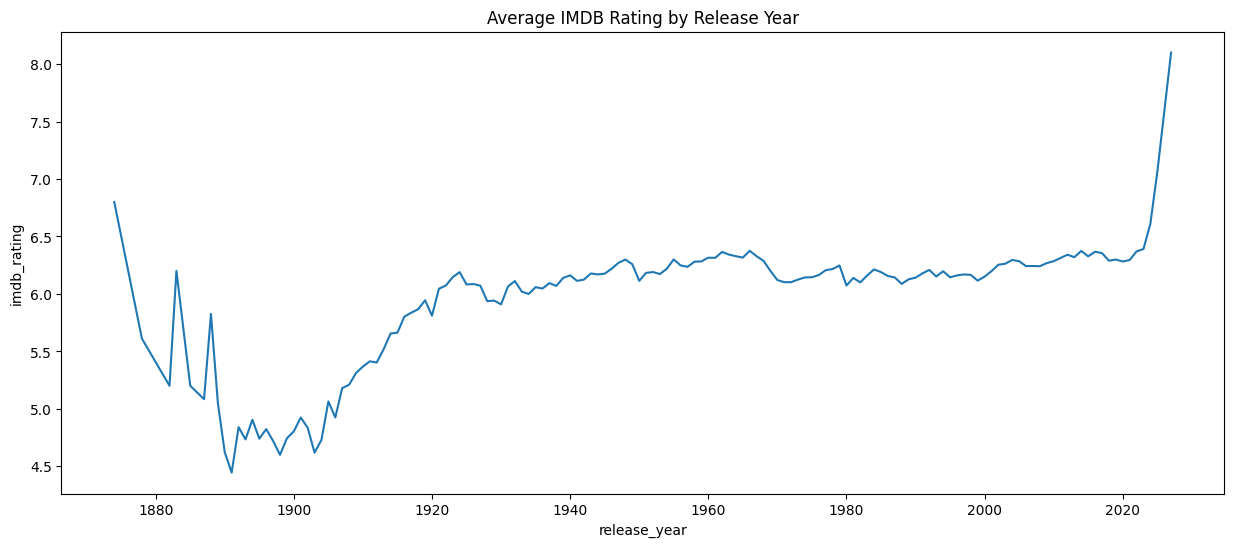

In [37]:
yearly_ratings = train_df.groupby('release_year')['imdb_rating'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(data=yearly_ratings, x='release_year', y='imdb_rating')
plt.title('Average IMDB Rating by Release Year')
plt.show()

### Average rating by month


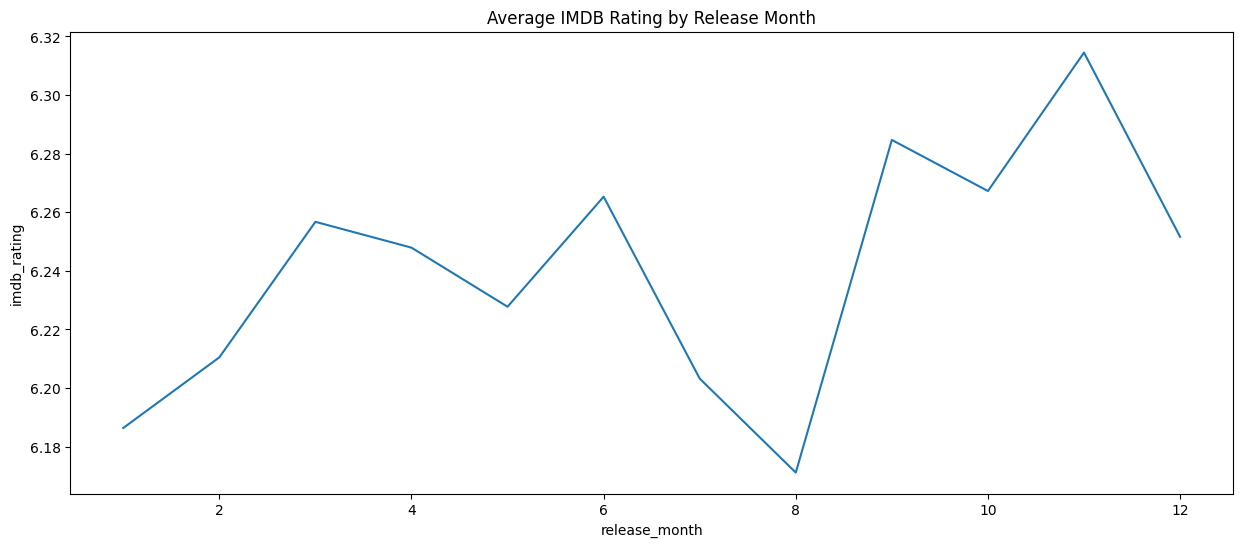

In [38]:
monthly_ratings = train_df.groupby('release_month')['imdb_rating'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_ratings, x='release_month', y='imdb_rating')
plt.title('Average IMDB Rating by Release Month')
plt.show()

### Rating distribution by status

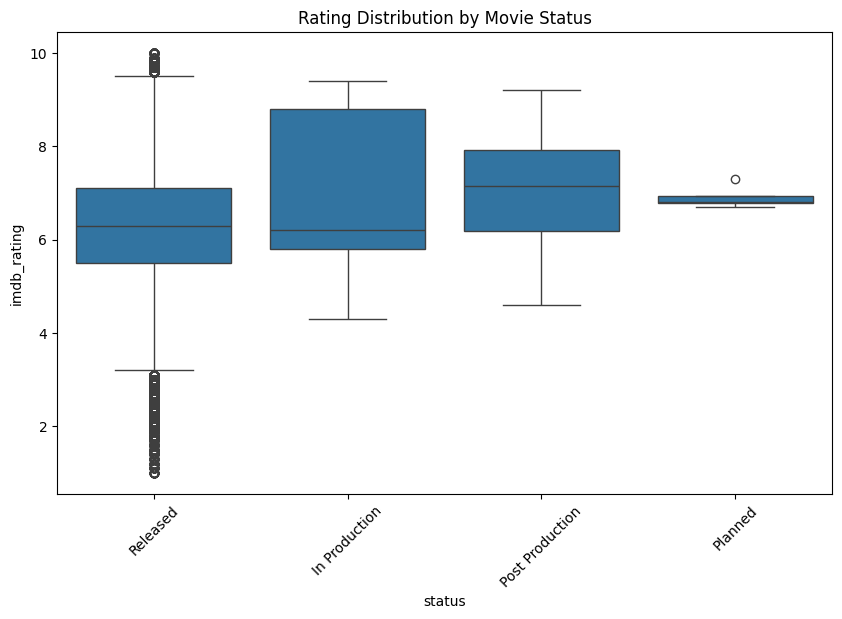

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='status', y='imdb_rating')
plt.title('Rating Distribution by Movie Status')
plt.xticks(rotation=45)
plt.show()